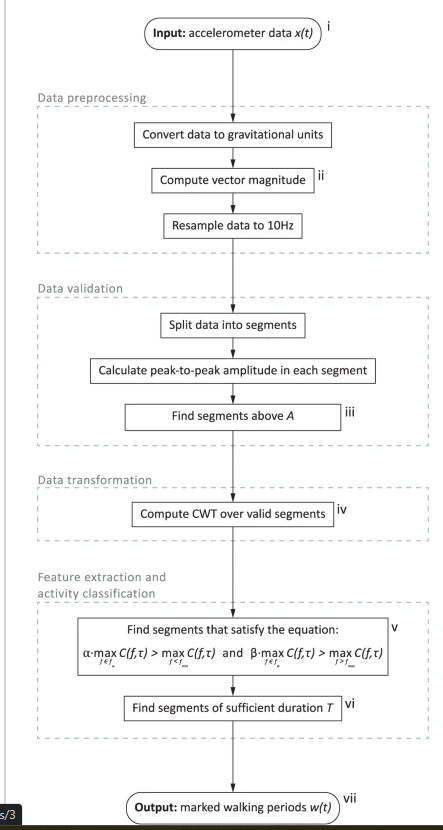

In [45]:
# Algorithm flow
from IPython.display import Image, display
display(Image(filename='../additional_files/accTosf_algo.png'))

In [46]:
from scipy.signal import find_peaks
import numpy as np
import pandas as pd
#import import_ipynb
from base_functions import find_walking, peak2peak

# Frequency sampling
FS = 32
# Max and Min frequency (for running)
Fw_max = 6
Fw_min = 0.5
# Mininum consecutive windows to identify running (in sec)
min_T = 6
# Segment threshold
A = 0.3
# Parameters for equation from algorithm flow
alpha = 31.7
beta = 1.4

In [47]:
# Read data
df = pd.read_csv('../recordings/walking_metronome_100bpm/ACC.csv', skiprows=2, header=None)
df.columns = ['x', 'y', 'z']
magnitude = np.linalg.norm(df, axis=1)-1

In [48]:
# Split data into segments - 1 sec windows
# Only segments with length 32 are valid
magnitude = magnitude[:len(magnitude)-len(magnitude)%32]
magnitude_segments = magnitude.reshape(-1,FS)

In [49]:
# Calculate peak-to-peak amp in each segment
ptp_amp = np.apply_along_axis(peak2peak,axis=1,arr=magnitude_segments)

In [50]:
# Find segments above A
magnitude_segments[ptp_amp < A] = 0
magnitude = magnitude_segments.reshape(len(magnitude))
valid = np.ones(len(ptp_amp), dtype=bool)
valid[ptp_amp < A] = False
#omit segments with amplitude below A
tapered_magnitude = magnitude[np.repeat(valid, FS)]


In [ ]:
# Number of identified steps per second
cadence = find_walking(magnitude=tapered_magnitude, valid=valid, fs=FS, 
                       step_freq=(Fw_min, Fw_max), alpha=alpha, beta=beta,
                       min_t=min_T, delta=220, plot_CWT=False)

print(cadence)                       